# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "data/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [2]:
# enter your code here
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=da) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Wed, 24 Jul 2019   Prob (F-statistic):             0.0991
Time:                        22:13:40   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0564      0.290    100.143      0.000      28.488      29.625
RIDAGEYR       0.0091      0.006      1.649      0.099      -0.002       0.020
==============================================================================
Omnibus:                      936.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.656
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.964   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

The BMI tends to increase with age.

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

No alpha value given. So cannot say.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

0.182

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

0.001

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [3]:
# enter your code here
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
print(da['RIDRETH1'].value_counts())
da["RIDRETH1x"] = da.RIDRETH1.replace({1:'Mexican American', 2:'Other Hispanic', 3:'Non-Hispanic White', 4:'Non-Hispanic Black',5:'Other Race - Including Multi-Racial'})
model1 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR+RIAGENDRx+RIDRETH1x", data=da) 
result1 = model1.fit()
result1.summary()
#result.predict({'RIDRETH1x':'Mexican American',})

3    1692
4    1058
1     896
5     771
2     685
Name: RIDRETH1, dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.27
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           3.98e-59
Time:                        22:13:41   Log-Likelihood:                -17007.
No. Observations:                5102   AIC:                         3.403e+04
Df Residuals:                    5095   BIC:                         3.407e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.2361      0.355     87.891      0.000      30.539      31.933
RIAGENDRx[T.Male]                                   -1.0226      0.190     -5.370      0.000      -1.396      -0.649
RIDRETH1x[T.Non-Hispanic Black]                     -0.4499      0.308     -1.460      0.144      -1.054       0.154
RIDRETH1x[T.Non-Hispanic White]                     -1.8555      0.282     -6.588      0.000      -2.408      -1.303
RIDRETH1x[T.Other Hispanic]                         -0.9379      0.345     -2.721      0.007      -1.614      -0.262
RIDRETH1x[T.Other Race - Including Multi-Racial]    -4.7799      0.334    -14.318      0.000      -5.434      -4.125
RIDAGEYR                                             0.0065      0.005      1.196      0.232      -0.004       0.017
==============================================================================
Omnibus:                      917.090   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.286
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.026   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

the coefficient reduced

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

reduced by 0.001

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

0.054

__Q2d.__ What reference level did the software select for the ethnicity variable?

Mexican American

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

0.065

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

BMI of black man is less by 1.4725

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [4]:
# enter your code here
print(da.shape[0])
da_sampled = da.sample(int(0.25*da.shape[0]))
print(da_sampled.shape)

model2 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR+RIAGENDRx+RIDRETH1x", data=da_sampled) 
result2 = model2.fit()
result2.summary()

5102
(1275, 9)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     9.275
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           5.71e-10
Time:                        22:13:41   Log-Likelihood:                -4230.8
No. Observations:                1275   AIC:                             8476.
Df Residuals:                    1268   BIC:                             8512.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           30.7214      0.701     43.849      0.000      29.347      32.096
RIAGENDRx[T.Male]                                   -1.0768      0.377     -2.860      0.004      -1.816      -0.338
RIDRETH1x[T.Non-Hispanic Black]                     -0.6244      0.617     -1.013      0.311      -1.834       0.585
RIDRETH1x[T.Non-Hispanic White]                     -1.4650      0.558     -2.627      0.009      -2.559      -0.371
RIDRETH1x[T.Other Hispanic]                         -0.6085      0.687     -0.886      0.376      -1.956       0.739
RIDRETH1x[T.Other Race - Including Multi-Racial]    -4.0087      0.667     -6.010      0.000      -5.317      -2.700
RIDAGEYR                                             0.0130      0.011      1.214      0.225      -0.008       0.034
==============================================================================
Omnibus:                      275.385   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.432
Skew:                           1.171   Prob(JB):                    1.57e-141
Kurtosis:                       5.592   Cond. No.                         310.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

the standard errors are double

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

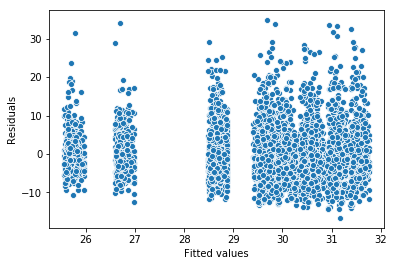

In [5]:
# enter your code here
pp = sns.scatterplot(result1.fittedvalues, result1.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")
#(result1.fittedvalues,result1.resid)
#result1.resid


__Q4a.__ What mean/variance relationship do you see?

the mean variance relationship 

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

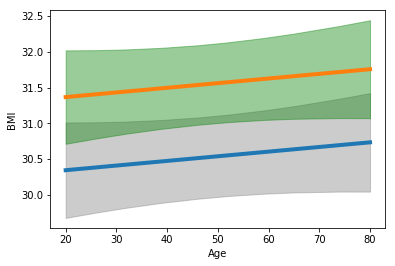

In [21]:
# enter your code here
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"RIAGENDRx": "Male",
          "RIDRETH1x": 'Mexican American',
          "RIAGENDR": 1, "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1,'BPXSY1':25}
values_w = {"RIAGENDRx": "Female",
          "RIDRETH1x": 'Mexican American',
          "RIAGENDR": 1, "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1,'BPXSY1':25}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result1, "RIDAGEYR",
                values=values, ci_method="simultaneous")
pr1, cb1, fv1 = predict_functional(result1, "RIDAGEYR",
                values=values_w, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

sns.lineplot(fv1, pr1, lw=4,ax=ax)
ax.fill_between(fv1, cb1[:, 0], cb1[:, 1], color='green', alpha=0.4);

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

50

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

None

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

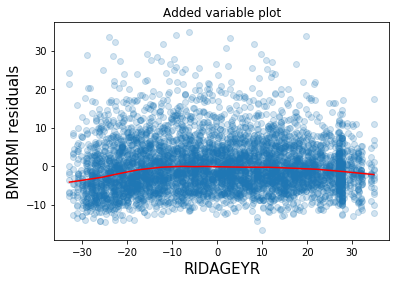

In [24]:
# enter your code here
from statsmodels.graphics.regressionplots import add_lowess

model = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR+RIAGENDRx+RIDRETH1x", data=da)
result = model.fit()
result.summary()

fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

there is a slight increase in BMI with age during first two decades.

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [8]:
# enter your code here

__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [9]:
# enter your code here

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [10]:
# enter your code here

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

In [11]:
# enter your code here

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?